# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [168]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [169]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [170]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | BA cancelled my flight home to...
1,"Not Verified | BA cancelled my flight home, t..."
2,✅ Trip Verified | Turned up 3.5 hours in advan...
3,Not Verified | Boarding – at gate at LGW they...
4,✅ Trip Verified | Missing baggage customer se...


In [171]:
from google.colab import drive
drive.mount('/content/drive')
df.to_csv("/content/drive/MyDrive/Colab Notebooks/BA_reviews.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [172]:
#packages
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn import metrics
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [181]:
#clean data

filler_words = set(stopwords.words('english'))
filler_words = list(filler_words) + ['verified','trip','ba','flight'] #extra words to exclude

sia = SentimentIntensityAnalyzer() # assign sentiment uning inbuilt sentiment analyser
df.insert(1,"sentiment",None)

for i in range (df.shape[0]):
    phrase = str(df["reviews"][i])
    cleaned = re.sub(r'[^\w]', ' ', phrase) #remove all special characters 
    cleaned = re.sub(r'[\d]', ' ',cleaned)  #remove all numbers 
    ss= sia.polarity_scores(cleaned) #assign sentiment
    sentiment = ss["compound"]
    cleaned = word_tokenize(cleaned.lower()) #tokenise words
    cleaned = [w for w in cleaned if w not in filler_words] # #remove all filler words
    df["reviews"][i]= cleaned 
    df["sentiment"][i]= sentiment 


df.head(10) #check reviews


,reviews,sentiment
0,"[cancelled, home, heathrow, dec, th, face, sen...",-0.9287
1,"[cancelled, home, last, day, heathrow, tried, ...",-0.6461
2,"[turned, hours, advance, terminal, london, hea...",-0.8176
3,"[boarding, gate, lgw, called, group, board, wo...",0.9682
4,"[missing, baggage, customer, service, worst, e...",-0.8074
5,"[flag, carrier, used, check, staff, club, euro...",0.9932
6,"[stupidly, tried, five, year, gap, paid, wife,...",-0.8402
7,"[seat, horribly, narrow, thankfully, quarter, ...",0.886
8,"[glasgow, london, delayed, hour, wife, accept,...",-0.5984
9,"[tried, check, online, offered, upgrade, premi...",0.9726


In [182]:
X=df["reviews"] #isolate words

In [183]:
from sklearn.feature_extraction.text import CountVectorizer #sparse matrix for training

vectorizer = CountVectorizer()
vectorizerfit = vectorizer.fit_transform(X.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
vec = pd.DataFrame(data=count_array,columns=names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# EDA

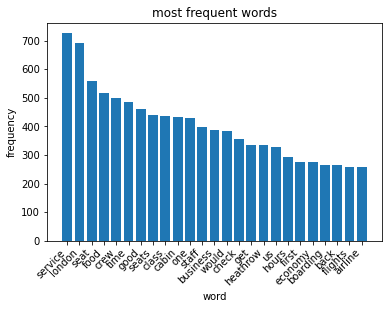

In [186]:
#most frequent words

freqwords = vec.sum(axis=0)
#freqwords_mult=freqwords[freqwords>1]
#names_mult=nmes[freqwords>1]
freqwords=freqwords.sort_values(ascending=False)

#top25
y=freqwords[:25]
x=freqwords.keys()[:25]

ax= plt.subplot()
plt.bar(x,y)
plt.title("most frequent words")
plt.xlabel("word")
plt.ylabel("frequency")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

In [188]:
#split via sentiment

posneg = df["sentiment"]
pos=(posneg[posneg>=0])
neg=(posneg[posneg<0])


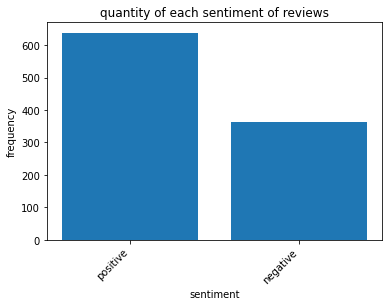

[638, 362]


In [189]:
#sentiment split of reviews
xx=['positive','negative']
yy=[len(pos),len(neg)]
ax= plt.subplot()
plt.bar(xx,yy)
plt.title("quantity of each sentiment of reviews")
plt.xlabel("sentiment")
plt.ylabel("frequency")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()
print(yy)

In [191]:
#analyse positive and negative reviews separately
df.insert(2,"sentimentlabel",None)
for i in range (df.shape[0]):
  if (df['sentiment'][i]>=0):
    df['sentimentlabel'][i]='pos'
  else:
    df['sentimentlabel'][i]='neg'


df_group = df.groupby('sentimentlabel')
negX= df_group.get_group('neg')["reviews"]
posX= df_group.get_group('pos')["reviews"]



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


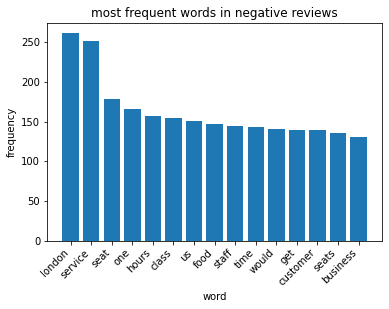

In [193]:
#most frequent words in negative reviews
vectorizer = CountVectorizer()
vectorizerfit = vectorizer.fit_transform(negX.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
vecneg = pd.DataFrame(data=count_array,columns=names)

freqwordsneg = vecneg.sum(axis=0)
#freqwords_mult=freqwords[freqwords>1]
#names_mult=nmes[freqwords>1]
freqwordsneg=freqwordsneg.sort_values(ascending=False)

#top25
y=freqwordsneg[:15]
x=freqwordsneg.keys()[:15]

ax= plt.subplot()
plt.bar(x,y)
plt.title("most frequent words in negative reviews")
plt.xlabel("word")
plt.ylabel("frequency")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

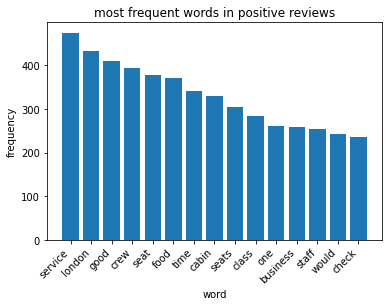

In [194]:
#most frequent words in positive reviews
vectorizer = CountVectorizer()
vectorizerfit = vectorizer.fit_transform(posX.astype(str))
names = vectorizer.get_feature_names()
count_array = vectorizerfit.toarray()
vecpos = pd.DataFrame(data=count_array,columns=names)

freqwordspos = vecpos.sum(axis=0)
#freqwords_mult=freqwords[freqwords>1]
#names_mult=nmes[freqwords>1]
freqwordspos=freqwordspos.sort_values(ascending=False)

#top25
y=freqwordspos[:15]
x=freqwordspos.keys()[:15]

ax= plt.subplot()
plt.bar(x,y)
plt.title("most frequent words in positive reviews")
plt.xlabel("word")
plt.ylabel("frequency")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

# Insights

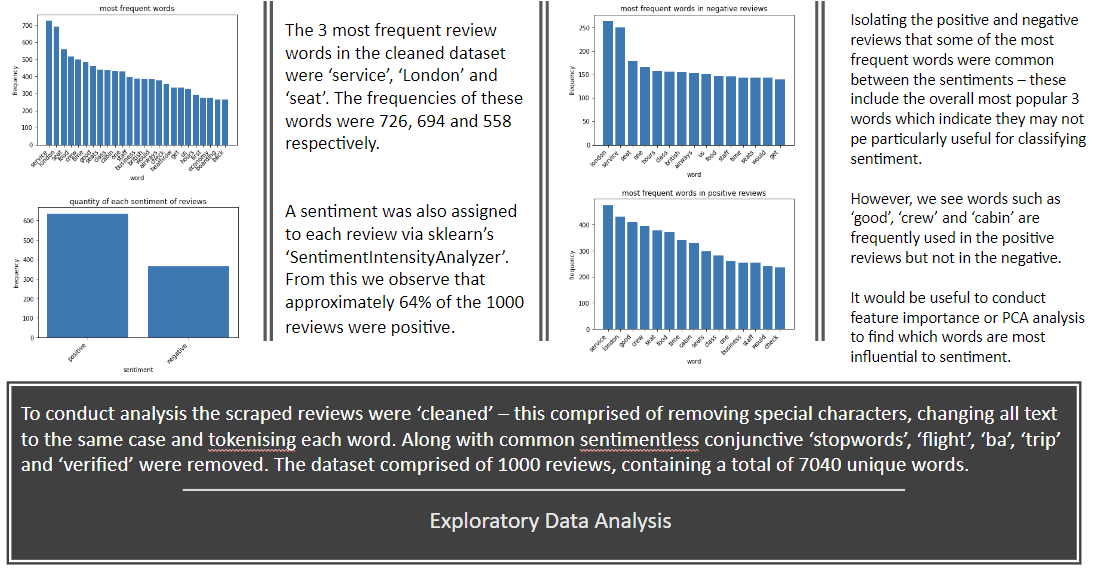